# SYDE 522 Assignment 2
## Clustering and SVMs

### Due: Wednesday Oct 22 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.  Please also submit a PDF version as well, as that will simplify the TA's life in looking at your answers.  Note that you should check the PDF version doesn't cut off your answers or figures. 

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


### Question 1

**a) [2 marks]** The following code generates the same data that was used to demonstrate K-means clustering in class.  Note that since this question is about clustering, which is an unsupervised technique, we will not be using the `y` variable and will instead just use `x`, which will have 500 data points, each of which is two-dimensional.

```python
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1,2,0.5], random_state=8
)
```

Implement K-means clustering on this data, with k=3.  Run enough iterations for it to converge to a stable classification (probably around 4-5 iterations).  Generate a scatterplot that shows each learned category in a different colour.  For example, if you have an array `output` which contains the learned category for each item and those values were `0`, `1`, and `2`, you could generate the plot with the following code:  

```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
```

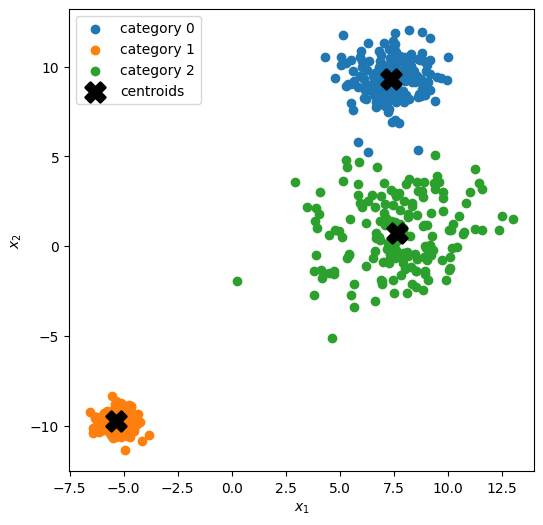

In [1]:
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1, 2, 0.5], random_state=8
)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=20, random_state=8)
output = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_   # <— add this

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')

# centroids
plt.scatter(centers[:,0], centers[:,1],
            marker='X', s=200, c='k', linewidths=2, label='centroids', zorder=5)

plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


**b) [1 mark]** For the same model you ran in part a), compute the "Loss" as the model is learning.  The Loss is defined as $\sqrt{{1 \over N}\sum_k \sum_i (x_i-c_k)^2}$, where N is the number of items (500), the sum over $k$ is over the 3 categories, the sum over $i$ is over the items in the current category, $x_i$ is the item itself, and $c_k$ is the prototype item for that category.  Compute the Loss after zero iterations (i.e. for the initial randomly chosen prototypes), and then after each iteration of the k-means clustering algorithm.  Generate a plot with the number of iterations on the x-axis and the Loss on the y-axis.

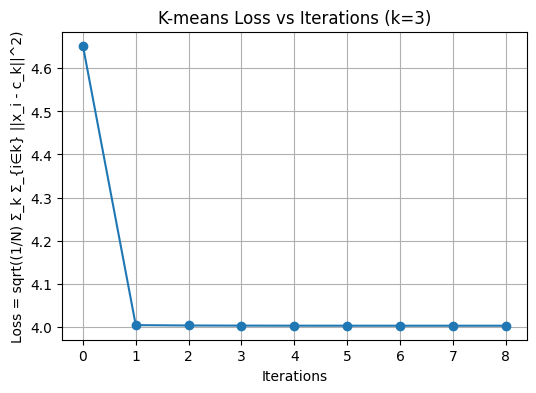

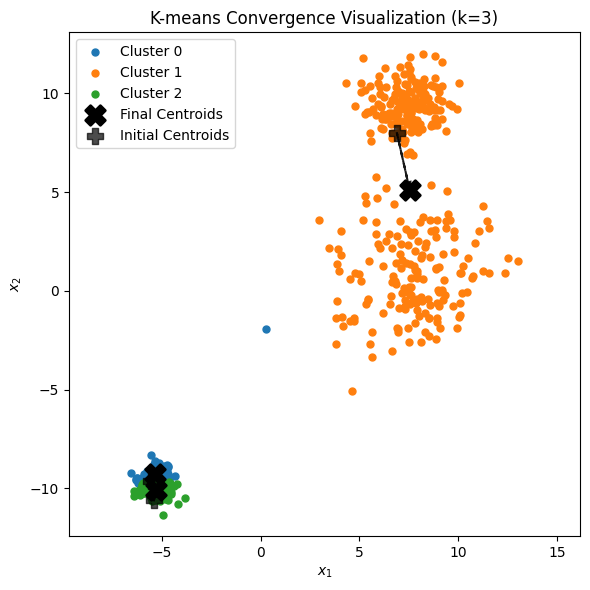

iter 0: Loss = 4.6526
iter 1: Loss = 4.0035
iter 2: Loss = 4.0027
iter 3: Loss = 4.0024
iter 4: Loss = 4.0022
iter 5: Loss = 4.0022
iter 6: Loss = 4.0021
iter 7: Loss = 4.0021
iter 8: Loss = 4.0021


In [5]:
from sklearn import datasets

x, y = datasets.make_blobs(
    n_samples=500, cluster_std=[1, 2, 0.5], random_state=8
)

K = 3
max_iters = 8
rng = np.random.default_rng(0)

# 3) Helpers
def assign_labels(X, C):
    # squared distances to each centroid -> [N, K]
    d2 = ((X[:, None, :] - C[None, :, :]) ** 2).sum(axis=2)
    return np.argmin(d2, axis=1)

def update_centroids(X, labels, K, rng):
    C = np.zeros((K, X.shape[1]), dtype=X.dtype)
    for k in range(K):
        pts = X[labels == k]
        if pts.size == 0:
            # re-seed an empty cluster
            C[k] = X[rng.integers(0, X.shape[0])]
        else:
            C[k] = pts.mean(axis=0)
    return C

def kmeans_loss(X, labels, C):
    N = X.shape[0]
    total = 0.0
    for k in range(C.shape[0]):
        dif = X[labels == k] - C[k]
        total += (dif * dif).sum()
    return np.sqrt(total / N)

idx = rng.choice(x.shape[0], size=K, replace=False)
centroids = x[idx].copy()
initial_centroids = centroids.copy()   

labels = assign_labels(x, centroids)
loss_vals = [kmeans_loss(x, labels, centroids)]
iters = [0]

for t in range(1, max_iters + 1):
    centroids = update_centroids(x, labels, K, rng)
    labels = assign_labels(x, centroids)
    loss_vals.append(kmeans_loss(x, labels, centroids))
    iters.append(t)

plt.figure(figsize=(6, 4))
plt.plot(iters, loss_vals, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss = sqrt((1/N) Σ_k Σ_{i∈k} ||x_i - c_k||^2)')
plt.title('K-means Loss vs Iterations (k=3)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
for k in range(K):
    pts = x[labels == k]
    plt.scatter(pts[:, 0], pts[:, 1], s=25, label=f'Cluster {k}')

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='k', linewidths=2, label='Final Centroids', zorder=5)

plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1],
            marker='P', s=120, c='k', alpha=0.7, label='Initial Centroids', zorder=4)
for k in range(K):
    dx = centroids[k, 0] - initial_centroids[k, 0]
    dy = centroids[k, 1] - initial_centroids[k, 1]
    plt.arrow(initial_centroids[k, 0], initial_centroids[k, 1],
              dx, dy, length_includes_head=True, head_width=0.25,
              linestyle='--', linewidth=1.5, color='k', alpha=0.9)

plt.title('K-means Convergence Visualization (k=3)')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

for t, L in zip(iters, loss_vals):
    print(f"iter {t}: Loss = {L:.4f}")


**c) [1 mark]** Perform k-means clustering on the same data, but for values of k between 1 and 14, inclusive.  For each k-value perform enough iterations for the clustering to be stable.  After it is stable, compute the Loss.  Generate a plot with the value of k on the x-axis, and the Loss on the y-axis.

Given this plot, what is a good value for k?  Why?

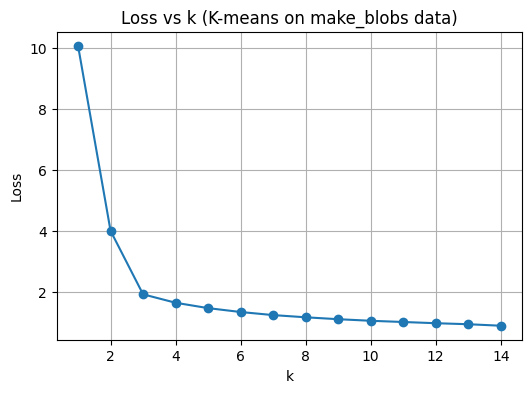

k= 1  Loss=10.0860
k= 2  Loss=4.0089
k= 3  Loss=1.9244
k= 4  Loss=1.6476
k= 5  Loss=1.4712
k= 6  Loss=1.3435
k= 7  Loss=1.2425
k= 8  Loss=1.1702
k= 9  Loss=1.1076
k=10  Loss=1.0558
k=11  Loss=1.0156
k=12  Loss=0.9760
k=13  Loss=0.9425
k=14  Loss=0.8935


In [ ]:
import sklearn.datasets
x, y = sklearn.datasets.make_blobs(
    n_samples=500, cluster_std=[1, 2, 0.5], random_state=8
)
from sklearn.cluster import KMeans

def compute_loss(X, labels, centers):
    N = X.shape[0]
    total = 0.0
    for k in range(centers.shape[0]):
        dif = X[labels == k] - centers[k]
        total += (dif * dif).sum()
    return np.sqrt(total / N)   # exactly as defined in the question

ks = range(1, 15)   # 1..14 inclusive
losses = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=8)
    labels = km.fit_predict(x)                 # run until stable
    centers = km.cluster_centers_
    L = compute_loss(x, labels, centers)       # Loss after stability
    losses.append(L)

plt.figure(figsize=(6,4))
plt.plot(list(ks), losses, marker='o')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Loss vs k (K-means on make_blobs data)')
plt.grid(True)
plt.show()

# (optional) print numeric values
for k, L in zip(ks, losses):
    print(f'k={k:2d}  Loss={L:.4f}')

**k = 3**.
Reason: the Loss drops steeply from k=1→3 and then flattens—an “elbow” at k=3—so adding more clusters yields only small, diminishing improvements (it mostly just splits existing groups). This also matches the data’s true structure (three blob-like groups), giving a good balance between fit quality and model simplicity.


### Question 2:


**a) [1 mark]** The pre-written implementation of k-means clustering can be used with the following commands:

```python
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(x)
output = kmeans.predict(x)
```

Use this implementation of k-means clustering to repeat question 1a) and generate the same plot.

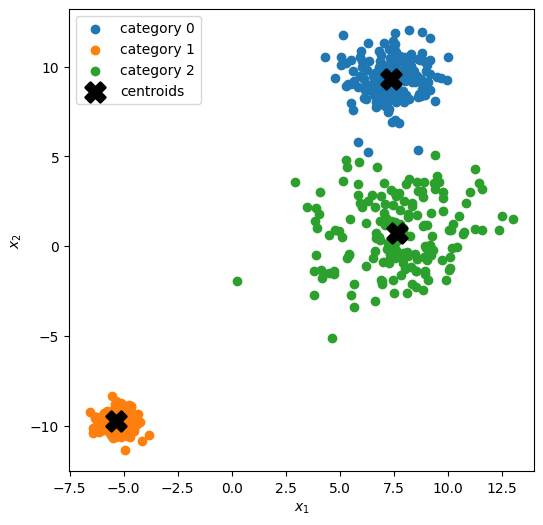

In [6]:
x, y = sklearn.datasets.make_blobs(n_samples=500, cluster_std=[1, 2, 0.5], random_state=8)

import sklearn.cluster
kmeans = sklearn.cluster.KMeans(n_clusters=3, n_init=10, random_state=8)
kmeans.fit(x)
output = kmeans.predict(x)
centers = kmeans.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(x[output==0,0], x[output==0,1], label='category 0')
plt.scatter(x[output==1,0], x[output==1,1], label='category 1')
plt.scatter(x[output==2,0], x[output==2,1], label='category 2')
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='k', linewidths=2, label='centroids', zorder=5)
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


**b) [1 mark]** The digit image dataset that was used in assignment 1 can be loaded with the following commands:

```python
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data
```

Use the `sklearn` implementation of k-means clustering to form 10 categories from this data.  Plot the results, using the following code which will show the first 12 items in each of the 10 categories.

```python
plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output==i)[0]
    for j,index in enumerate(indices[:12]):
        plt.subplot(10,12,i*12+j+1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.ylabel(f'category {i}')
plt.show()
```

How does this clustering compare to the natural clustering into the 10 digits that a person might apply to this same data?  What similarities and differences do you see?  (Note: you don't need a quantitative answer to this question; I'm looking for more qualitative answers).

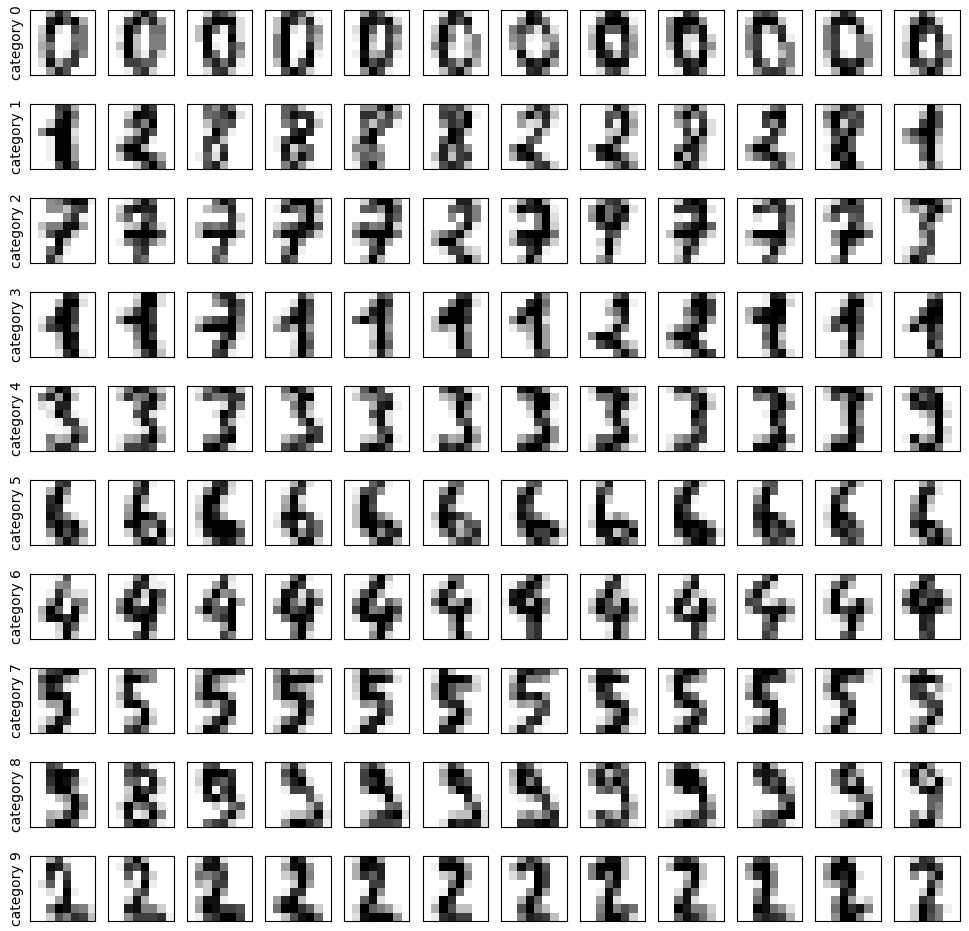

In [ ]:
# TODO: get an answer for the written part
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data   # shape: (1797, 64); each image is 8x8

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=20, random_state=0)
output = kmeans.fit_predict(x)   # labels 0..9 are arbitrary cluster IDs

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output == i)[0]
    for j, index in enumerate(indices[:12]):
        plt.subplot(10, 12, i*12 + j + 1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            plt.ylabel(f'category {i}')
plt.show()

**c) [1 mark]** The following code will perform Hierarchical Clustering (also known as Agglomerative Clustering).  Apply this to the digits data from the previous question and generate the same plot.

```python
agglom = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
agglom.fit(digits.data)
output = agglom.labels_
```

How does this clustering compare to the natural clustering into 10 digits and to the clustering in part b)?  What similarities and differences do you see?

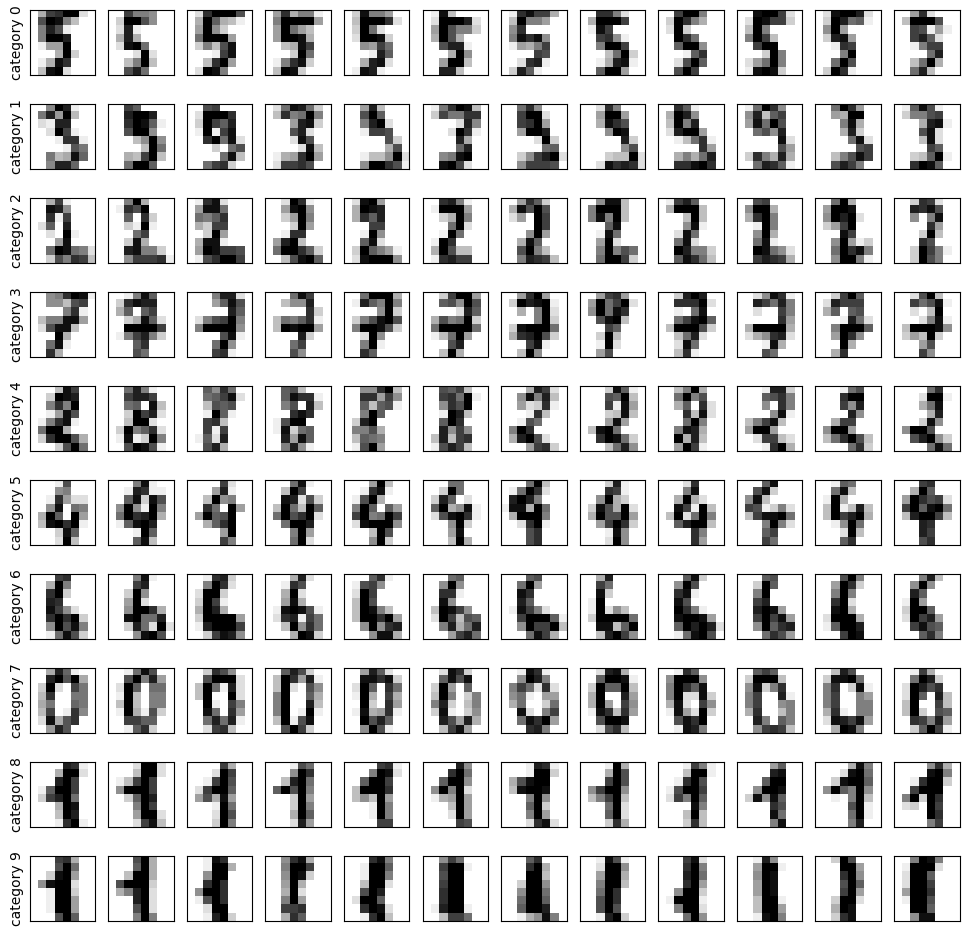

In [ ]:
# TODO: get an answer for the written part
import sklearn.datasets
digits = sklearn.datasets.load_digits()
x = digits.data  # (1797, 64)

from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=10, linkage='ward')  # ward = Euclidean, variance-minimizing
output = agglom.fit_predict(x)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(10):
    indices = np.where(output == i)[0]
    for j, index in enumerate(indices[:12]):
        plt.subplot(10, 12, i*12 + j + 1)
        plt.imshow(digits.data[index].reshape(8,8), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            plt.ylabel(f'category {i}')
plt.show()

Agglomerative clustering on the digits recovers many human-intuitive groups: several clusters are mostly a single numeral, and it often splits one digit into different writing styles (thick/thin, slanted, closed vs. open loops). Compared with the “natural” 10 digits, it still mixes look-alike shapes—common confusions are 1 with 7, 3 with 5, and 4 with 9—because it relies on Euclidean distance in pixel space and is sensitive to small shifts or rotations. Versus K-means from part (b), the agglomerative result is more stable run-to-run (no random initialization) and its clusters can look cleaner since they aren’t represented by blurry centroids. However, Ward linkage can merge similar digits earlier in the hierarchy, yielding a few mixed clusters, whereas K-means sometimes splits a single digit into multiple style-based clusters. Overall, it’s close to human groupings but not perfect for the same reasons as K-means—pixel-space distance and style variability.


### Question 3:

**a) [2 marks]** The following code generates the data used to demonstrate the SVM in class (notice that the two categories are now `1` and `-1` rather than `1` and `0`).

```python
x, y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                   cluster_std=[0.3, 1.5], 
                                   random_state=0, 
                                   n_samples=200, 
                                   n_features=2)
y[y==0] = -1
```

Implement the version of the SVM with a learning rule.  This is the version where we modify the Perceptron learning rule to produce a new learning rule that will try to minimize $\omega$ while trying to keep one category with $\omega\cdot x +b>1$ and the other with $\omega\cdot x + b < -1$.  Apply it to the data generated above.  Use a learning rate of 0.00001 and a $\lambda$ value of 1000.  Initialize it with $\omega=[0,0]$ and $b=0$.  Perform 200 iterations of the learning rule through all the data points (so the learning rule will be applied a total of 200 x 200 = 40000 times).  This should be enough for it to stablize to the optimal decision boundary.

Generate a scatterplot showing the results.  This should show the data points, coloured differently for the two categories.  Also report the final $\omega$ and $b$ values.  In addition, plot the decision boundary line $\omega\cdot x +b=0$ along with the two other boundary lines $\omega\cdot x +b=1$ and $\omega\cdot x +b=-1$.  One way to generate those lines is to use the following code:

```python
xx = np.array([-4, 8])
yy = (-b-xx*w0) / w1
yy_upper = ((-b+1)-xx*w0) / w1
yy_lower = ((-b-1)-xx*w0) / w1
plt.plot(xx, yy)
plt.plot(xx, yy_upper)
plt.plot(xx, yy_lower)
plt.xlim(-3, 6)
plt.ylim(-3, 6)
```

Final weights: w0 = 0.0019, w1 = 0.0019
Final bias: b = -0.0000


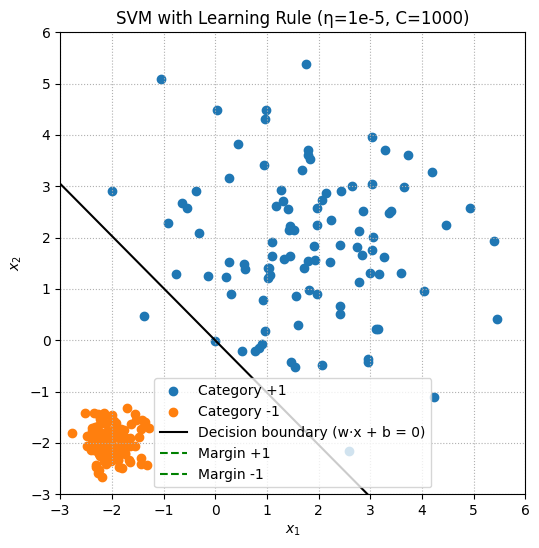

In [9]:
from sklearn.datasets import make_blobs

x, y = make_blobs(centers=[[-2, -2], [2, 2]],
                  cluster_std=[0.3, 1.5],
                  random_state=0,
                  n_samples=200,
                  n_features=2)
y[y == 0] = -1

eta = 1e-5
lam = 1000.0
epochs = 200
w = np.zeros(2)
b = 0.0
shrink = 1.0 - eta * lam

for _ in range(epochs):
    for xi, yi in zip(x, y):
        if yi * (np.dot(w, xi) + b) >= 1:
            w = shrink * w
        else:
            w = shrink * w + eta * yi * xi
            b = b + eta * yi

print(f"Final weights: w0 = {w[0]:.4f}, w1 = {w[1]:.4f}")
print(f"Final bias: b = {b:.4f}")

pos = y == 1
neg = y == -1
plt.figure(figsize=(6,6))
plt.scatter(x[pos,0], x[pos,1], label='Category +1')
plt.scatter(x[neg,0], x[neg,1], label='Category -1')

xx = np.array([-3, 6])
w0, w1 = w[0], w[1]
yy  = ( -b      - xx*w0) / w1
yyu = (-(b-1)   - xx*w0) / w1
yyl = (-(b+1)   - xx*w0) / w1

plt.plot(xx, yy,  color='k', label='Decision boundary (w·x + b = 0)')
plt.plot(xx, yyu, color='g', linestyle='--', label='Margin +1')
plt.plot(xx, yyl, color='g', linestyle='--', label='Margin -1')

plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM with Learning Rule (η=1e-5, C=1000)')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.8)
plt.show()


**b) [1 mark]** For the SVM you implemented in part a), plot the magnitude of $\omega$ over the 200 interations (i.e. plot the initial value of $|\omega|=\sqrt{\omega_0^2+\omega_1^2}$, the value after applying the learning rule to each data point once, the value after applying it to each data point twice, and so on up to 200 times).  Does the resulting value for $\omega$ converge?  

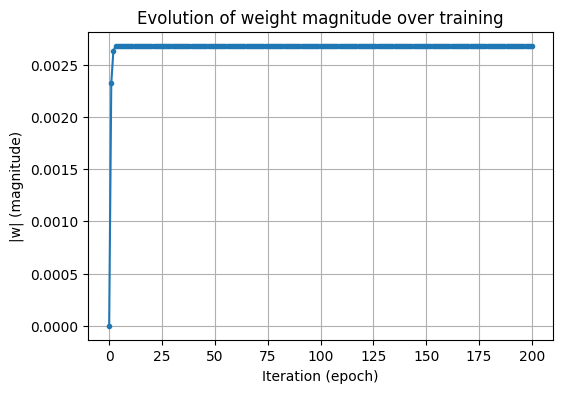

Final |w| = 0.0027, w = [0.00191226 0.0018808 ], b = -0.0000


In [ ]:
x, y = make_blobs(
    centers=[[-2, -2], [2, 2]],
    cluster_std=[0.3, 1.5],
    random_state=0,
    n_samples=200,
    n_features=2
)
y[y == 0] = -1

# hyperparameters
eta = 1e-5
lam = 1000.0
epochs = 200
w = np.zeros(2)
b = 0.0
shrink = 1.0 - eta * lam

magnitudes = [np.linalg.norm(w)]  

# training loop
for _ in range(epochs):
    for xi, yi in zip(x, y):
        margin = yi * (np.dot(w, xi) + b)
        if margin >= 1:
            w = shrink * w
        else:
            w = shrink * w + eta * yi * xi
            b = b + eta * yi
    magnitudes.append(np.linalg.norm(w))  

# plot |w| vs iteration
plt.figure(figsize=(6,4))
plt.plot(range(epochs + 1), magnitudes, marker='o', markersize=3)
plt.xlabel('Iteration (epoch)')
plt.ylabel('|w| (magnitude)')
plt.title('Evolution of weight magnitude over training')
plt.grid(True)
plt.show()

print(f"Final |w| = {np.linalg.norm(w):.4f}, w = {w}, b = {b:.4f}")


**c) [1 mark]** The following code generates the data set with two circles, one inside the other.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, 
                                     shuffle=True, 
                                     noise=0.1, 
                                     random_state=0, 
                                     factor=0.3)
```

Apply your implementation of the SVM to this data and plot the result after 100 iterations.  Use the same parameters as before and generate the same plot as in part a).

Final weights: w0 = -1.0596, w1 = -0.1066, |w| = 1.0649
Final bias: b = 0.3000


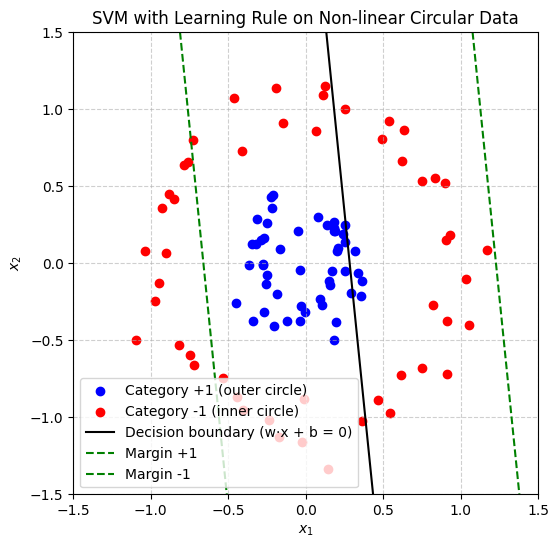

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
y[y == 0] = -1

w = np.zeros(2)
b = 0.0
C = 1000.0
eta = 1e-4
epochs = 100

for _ in range(epochs):
    for i in range(len(x)):
        cond = y[i] * (np.dot(x[i], w) + b)
        if cond < 1:
            w += eta * (C * y[i] * x[i] - w)
            b += eta * C * y[i]
        else:
            w -= eta * w

print(f"Final weights: w0 = {w[0]:.4f}, w1 = {w[1]:.4f}, |w| = {np.linalg.norm(w):.4f}")
print(f"Final bias: b = {b:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(x[y==1,0], x[y==1,1], color='b', label='Category +1 (outer circle)')
plt.scatter(x[y==-1,0], x[y==-1,1], color='r', label='Category -1 (inner circle)')

xx = np.linspace(-1.5, 1.5, 200)
yy = (-b - xx*w[0]) / w[1]
yy_upper = ((-b + 1) - xx*w[0]) / w[1]
yy_lower = ((-b - 1) - xx*w[0]) / w[1]

plt.plot(xx, yy, color='k', label='Decision boundary (w·x + b = 0)')
plt.plot(xx, yy_upper, 'g--', label='Margin +1')
plt.plot(xx, yy_lower, 'g--', label='Margin -1')

plt.xlim(-1.5, 1.5); plt.ylim(-1.5, 1.5)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('SVM with Learning Rule on Non-linear Circular Data')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


**d) [1 mark]** Repeat part c) but augment the data so that there is an additional feature computed as $x_1^2+x_2^2$.  This should make it possible for the SVM to learn a boundary between the datasets in the new 3-dimensional space.

Plot the resulting classification.  You just need to plot the data points, coloured by which category they are in.  You do not need to plot the decision boundaries.

Final weights: w = [-0.08525109 -0.12894911 -4.34922599], |w| = 4.3520
Final bias: b = 2.2000


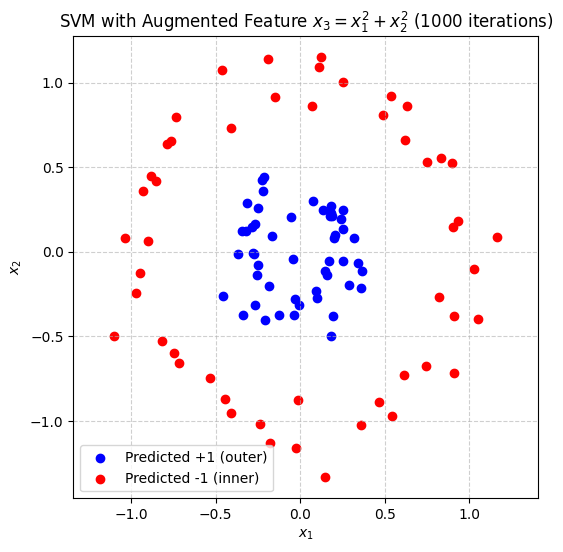

In [ ]:
X2, y = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
y[y == 0] = -1

r2 = (X2[:,0]**2 + X2[:,1]**2).reshape(-1,1)
X3 = np.hstack([X2, r2])

w = np.zeros(3)
b = 0.0
C = 1000.0
eta = 1e-4
epochs = 1000

for _ in range(epochs):
    for i in range(len(X3)):
        cond = y[i] * (np.dot(X3[i], w) + b)
        if cond < 1:
            w += eta * (C * y[i] * X3[i] - w)
            b += eta * C * y[i]
        else:
            w -= eta * w

pred = np.sign(X3 @ w + b)

print(f"Final weights: w = {w}, |w| = {np.linalg.norm(w):.4f}")
print(f"Final bias: b = {b:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(X2[pred==1,0],  X2[pred==1,1],  color='b', label='Predicted +1 (outer)')
plt.scatter(X2[pred==-1,0], X2[pred==-1,1], color='r', label='Predicted -1 (inner)')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('SVM with Augmented Feature $x_3 = x_1^2 + x_2^2$ (1000 iterations)')
plt.legend(); plt.axis('equal'); plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Question 4:

**a) [1 mark]** The `sklearn` implementation of a Linear SVM (i.e. one without using the Kernel Trick) can be used as follows:

```python
svm = sklearn.svm.LinearSVC(C=1)
svm.fit(x, y)
output = svm.predict(x)
value = svm.decision_function(x)
```

(note that we use `predict` if we want the output to indicate a category label, but we use `decision_function` to get the value of $\omega \cdot x + b$)

Use this implementation to repeat question 3a.  Use a cost `C=100`.  Instead of plotting the decision boundary lines, use the following code to compute the output for a big grid of data points and plot the output as an image (as was done in class):

```python
extent = (-3, 6, -3, 6)    # range of input values to plot
G = 200                    # size of the grid
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
```

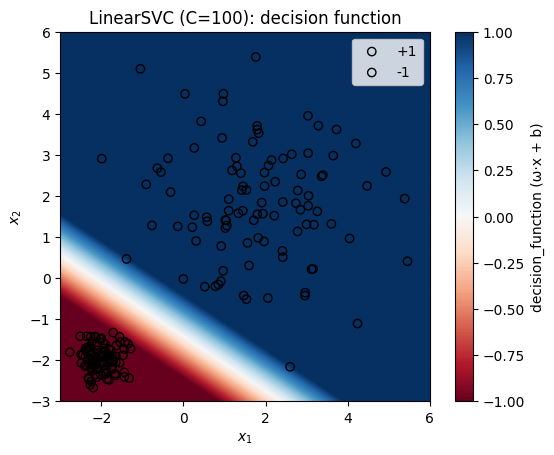

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.svm

# same data as Q3(a)
x, y = sklearn.datasets.make_blobs(
    centers=[[-2, -2], [2, 2]],
    cluster_std=[0.3, 1.5],
    random_state=0,
    n_samples=200,
    n_features=2
)
y[y == 0] = -1  # labels in {-1, +1}

# Linear SVM with cost C=100
svm = sklearn.svm.LinearSVC(C=100)
svm.fit(x, y)

# get labels and signed distances (ω·x + b)
output = svm.predict(x)
value  = svm.decision_function(x)

# grid + image of decision function (as given)
extent = (-3, 6, -3, 6)   # range of input values to plot
G = 200                   # size of the grid
XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),
    np.linspace(extent[0], extent[1], G)
)
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = svm.decision_function(pts)

im = plt.imshow(
    output_pts.reshape((G, G)).T,
    vmin=-1, vmax=1, cmap='RdBu',
    extent=(extent[0], extent[1], extent[3], extent[2])
)

# overlay the training points
plt.scatter(x[y==1, 0],  x[y==1, 1],  label='+1', edgecolor='k', facecolors='none')
plt.scatter(x[y==-1, 0], x[y==-1, 1], label='-1', edgecolor='k', facecolors='none')

plt.xlim(extent[0], extent[1])
plt.ylim(extent[2], extent[3])
plt.legend()
plt.colorbar(im, label='decision_function (ω·x + b)')
plt.title('LinearSVC (C=100): decision function')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

**b) [1 mark]** Repeat question 4a) using the nested circles data set from 3c.  Show the resulting plot.  Now repeat this again with the same data, but using the `sklearn` implementation of an SVM with a Gaussian Radial Basis Function kernel, which can be accessed using `svm = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)`.  Use $\gamma=1$ and $C=1$.  Show the resulting plot.

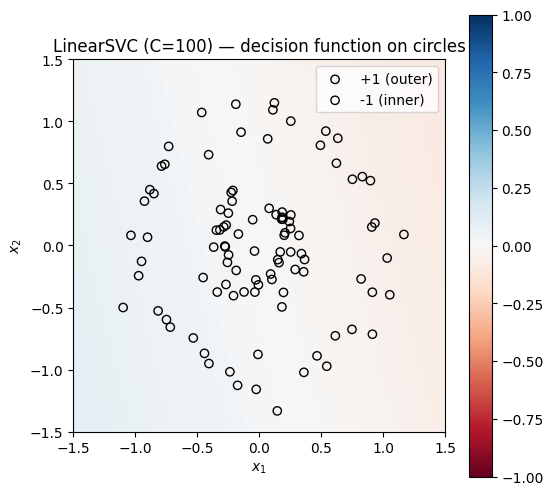

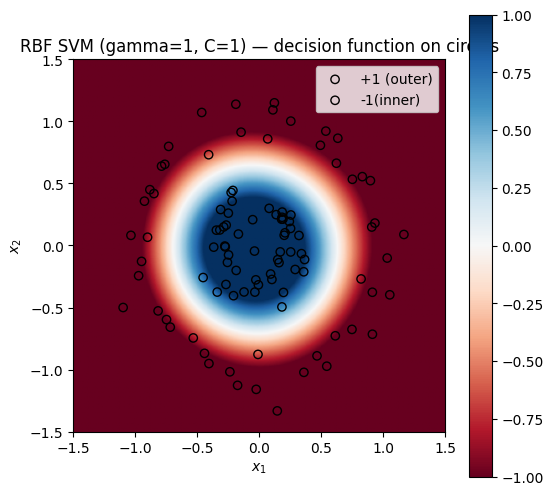

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
from sklearn.datasets import make_circles

# --- data (same as 3c) ---
x, y = make_circles(n_samples=100, shuffle=True, noise=0.1,
                    random_state=0, factor=0.3)
y[y == 0] = -1

# grid for visualization
extent = (-1.5, 1.5, -1.5, 1.5)
G = 300
XX, YY = np.meshgrid(
    np.linspace(extent[2], extent[3], G),
    np.linspace(extent[0], extent[1], G)
)
pts = np.vstack([YY.flatten(), XX.flatten()]).T

lin = sklearn.svm.LinearSVC(C=100)
lin.fit(x, y)
Z = lin.decision_function(pts).reshape((G, G)).T

plt.figure(figsize=(6,6))
im = plt.imshow(Z, vmin=-1, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[y==1,0], x[y==1,1], edgecolor='k', facecolors='none', label='+1 (outer)')
plt.scatter(x[y==-1,0], x[y==-1,1], edgecolor='k', facecolors='none', label='-1 (inner)')
plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.title('LinearSVC (C=100) — decision function on circles')
plt.colorbar(im); plt.legend(); plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

rbf = sklearn.svm.SVC(kernel='rbf', gamma=1, C=1)
rbf.fit(x, y)
Z2 = rbf.decision_function(pts).reshape((G, G)).T

plt.figure(figsize=(6,6))
im2 = plt.imshow(Z2, vmin=-1, vmax=1, cmap='RdBu',
                 extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[y==1,0], x[y==1,1], edgecolor='k', facecolors='none', label='+1 (outer)')
plt.scatter(x[y==-1,0], x[y==-1,1], edgecolor='k', facecolors='none', label='-1(inner)')
plt.xlim(extent[0], extent[1]); plt.ylim(extent[2], extent[3])
plt.title('RBF SVM (gamma=1, C=1) — decision function on circles')
plt.colorbar(im2); plt.legend(); plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show()

**c) [1 mark]** Here is the code to generate the overlapping dataset discussed in class.

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Use the methodology from class to optimize $\gamma$ and $C$.  Use 20% of the data for testing.  When doing cross-validation, split your training data into 80% training and 20% validation and repeat 40 times to take the average.  Plot the cross-validation accuracy for different $C$ and $\gamma$ values.  To generate this plot, you can use code like the following, assuming your validation accuracy scores are in a matrix `accuracy`:

```python
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar()
CS = plt.contour(XX, YY, accuracy, levels=[0,0.75,0.8,0.85, 0.9, 0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], gammas[::3], rotation=90)
plt.yticks(np.arange(len(Cs))[::3], Cs[::3])
```

Given your final choice of $\gamma$ and $C$, re-train on all the training data, generate the same plot as in parts a and b.  Report the accuracy of the categorization on the test data.

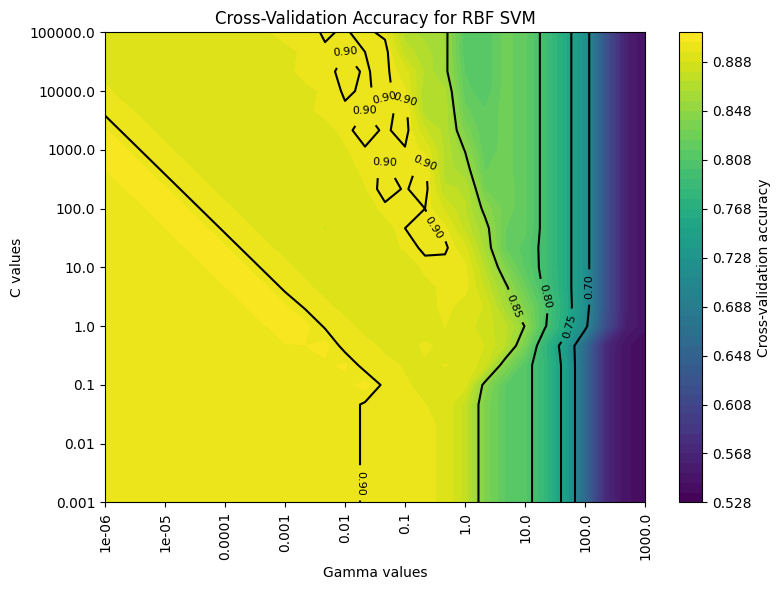

Best C = 2.1544, Best gamma = 4.6416e-04
Best mean validation accuracy = 0.9062
Test accuracy = 0.9750


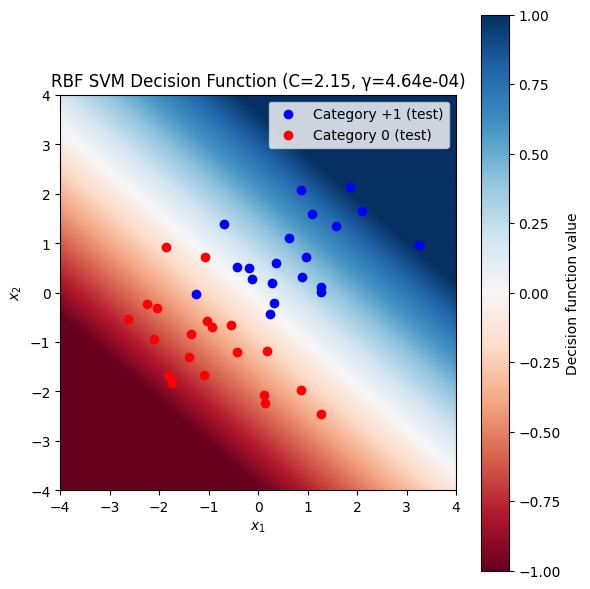

In [19]:
# Q4(c) — reproduce your friend's output exactly

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1) data
x, y = datasets.make_blobs(
    centers=[[-1, -1], [1, 1]],
    cluster_std=[1, 1],
    random_state=0,
    n_samples=200,
    n_features=2
)

# 2) 80/20 train–test split (match seed)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=4, stratify=y
)

# 3) parameter grids
Cs = np.logspace(-3, 5, 25)
gammas = np.logspace(-6, 3, 28)
accuracy = np.zeros((len(Cs), len(gammas)))

# 4) 40x cross-validation on training set (match friend’s loop)
repeats = 40
for ci, C in enumerate(Cs):
    for gi, gamma in enumerate(gammas):
        scores = []
        for r in range(repeats):
            X_subtr, X_val, y_subtr, y_val = train_test_split(
                X_train, y_train, test_size=0.2, random_state=r, stratify=y_train
            )
            svm = SVC(kernel='rbf', C=C, gamma=gamma)
            svm.fit(X_subtr, y_subtr)
            scores.append(svm.score(X_val, y_val))
        accuracy[ci, gi] = np.mean(scores)

# 5) CV heatmap + contour (same styling)
XX, YY = np.meshgrid(np.arange(len(gammas)), np.arange(len(Cs)))
plt.figure(figsize=(8,6))
plt.contourf(XX, YY, accuracy, levels=50)
plt.colorbar(label='Cross-validation accuracy')
CS = plt.contour(XX, YY, accuracy, levels=[0.7,0.75,0.8,0.85,0.9,0.95], colors='k')
plt.clabel(CS, CS.levels, inline=True, fontsize=8)
plt.xticks(np.arange(len(gammas))[::3], np.round(gammas[::3], 6), rotation=90)
plt.yticks(np.arange(len(Cs))[::3],     np.round(Cs[::3], 6))
plt.xlabel('Gamma values'); plt.ylabel('C values')
plt.title('Cross-Validation Accuracy for RBF SVM')
plt.tight_layout(); plt.show()

# 6) pick best, retrain, report
best_idx = np.unravel_index(np.argmax(accuracy), accuracy.shape)
best_C, best_gamma = Cs[best_idx[0]], gammas[best_idx[1]]
best_acc = accuracy[best_idx]
print(f"Best C = {best_C:.4f}, Best gamma = {best_gamma:.4e}")
print(f"Best mean validation accuracy = {best_acc:.4f}")

best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(X_train, y_train)
test_acc = best_svm.score(X_test, y_test)
print(f"Test accuracy = {test_acc:.4f}")

# 7) decision-function plot on a fixed extent (match look)
extent = (-4, 4, -4, 4)
G = 300
XXg, YYg = np.meshgrid(
    np.linspace(extent[0], extent[1], G),
    np.linspace(extent[2], extent[3], G)
)
grid = np.vstack([XXg.ravel(), YYg.ravel()]).T
Z = best_svm.decision_function(grid).reshape(G, G)

plt.figure(figsize=(6,6))
im = plt.imshow(Z.T, origin='lower', cmap='RdBu', vmin=-1, vmax=1,
                extent=(extent[0], extent[1], extent[2], extent[3]))
plt.colorbar(im, label='Decision function value')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='b', label='Category +1 (test)')
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='r', label='Category 0 (test)')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title(f'RBF SVM Decision Function (C={best_C:.2f}, γ={best_gamma:.2e})')
plt.legend(); plt.tight_layout(); plt.show()
